<a href="https://colab.research.google.com/github/pantelis/aiml-common-assignments-projects/blob/main/solutions/assignments/answers-probability-assignment-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#placed my imports here for convenience

#+++++++++++++++++++++++++++++++++++
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#+++++++++++++++++++++++++++++++++++

#Problem 1a: (10 points)

### The heights of adult men in the United States are approximately normally distributed with a mean of 70 inches and a standard deviation of 3 inches. Heights of adult women are approximately normally distributed with a mean of 64.5 inches and a standard deviation of 2.5 inches.

### Graph the two distributions from 0 to 100 inches using the plotting framework of your choice ( Matplotlib, Seaborn etc.)

## Answer:

Text(0.5, 1.0, 'Both')

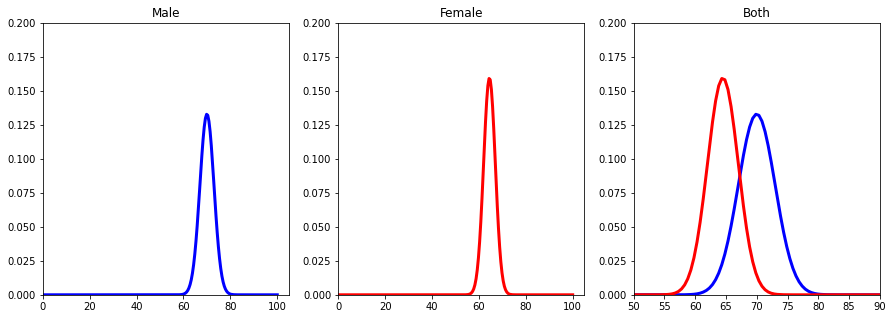

In [ ]:
#Answer
def maleHeightDist(xvals):
  return (1/(np.sqrt(9*2*np.pi)))*np.e**((-0.5)*((xvals-70)/(np.sqrt(9)))**2)

def femaleHeightDist(xvals):
  return (1/(np.sqrt(6.25*2*np.pi)))*np.e**((-0.5)*((xvals-64.5)/(np.sqrt(6.25)))**2)

xvals = np.linspace(0,100,200)
yvals1 = maleHeightDist(xvals)
yvals2 = femaleHeightDist(xvals)

plt.subplots(1,3, figsize = (15,5))

plt.subplot(1,3,1)
plt.plot(xvals, yvals1, color = "blue", linewidth=3)
plt.xlim(0,105)
plt.ylim(0,.20)
plt.title("Male")

plt.subplot(1,3,2)
plt.plot(xvals, yvals2, color = "red", linewidth=3)
plt.xlim(0,105)
plt.ylim(0,.20)
plt.title("Female")

plt.subplot(1,3,3)
plt.plot(xvals, yvals1, color = "blue", linewidth=3)
plt.plot(xvals, yvals2, color = "red", linewidth=3)
plt.xlim(50,90)
plt.ylim(0,.20)
plt.title("Both")

#Problem 1b: (10 points)

### What is the probability that a female is between the heights of 65 inches and 70 inches? What is the probability that a female is between the heights of 65 inches and 70 inches given that they are at least 60 inches tall ( You can use 100 as the upper limit of the distribution )?

(Hint: This is a probability assignment, not a calculus assignment. You do not need to calculate any integrals, just show the steps that you would take and the final result)

## Answer:

$P(65 \lt X_f \lt 70) = \int_{65}^{70}\frac{1}{\sqrt{6.25*2\pi}}e^{-\frac{1}{2}(\frac{x-64.5}{\sqrt{6.25}})^2} = .4068$

<br>

$P(65 \lt X_f \lt 70 | X \gt 60) = \frac{\int_{65}^{70}\frac{1}{\sqrt{6.25*2\pi}}e^{-\frac{1}{2}(\frac{x-64.5}{\sqrt{6.25}})^2}}{\int_{60}^{100}\frac{1}{\sqrt{6.25*2\pi}}e^{-\frac{1}{2}(\frac{x-64.5}{\sqrt{6.25}})^2}} = \frac{.4068}{.9640} = 0.4219$




Text(0.5, 1.0, 'Female')

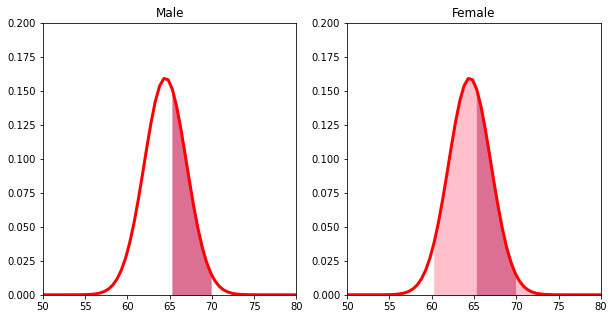

In [ ]:
#Answer
plt.subplots(1,2, figsize = (10,5))

plt.subplot(1,2,1)
plt.plot(xvals, yvals2, color = "red", linewidth=3)
plt.fill_between(xvals[130:140], yvals2[130:140], color = "palevioletred")
plt.xlim(50,80)
plt.ylim(0,.20)
plt.title("Male")

plt.subplot(1,2,2)
plt.plot(xvals, yvals2, color = "red", linewidth=3)
plt.fill_between(xvals[120:], yvals2[120:], color = "pink")
plt.fill_between(xvals[130:140], yvals2[130:140], color = "palevioletred")
plt.xlim(50,80)
plt.ylim(0,.20)
plt.title("Female")

#Problem 1c: (20 points)

### Lets say you conduct an experiment with a 100 trials where you measure a random man's height. Lets say the measurement that you take is always rounded down to an integer 

( ie. both a person with a height of 75.2 inches and a person of height 75.8 inches would be recorded as 75 inches thus making the distribution a discrete distribution instead of continuous). 

### What do you expect the count of men with a height of 70 inches to be? What type of distribution do you expect it to be?

( You do not need to answer these questions, it is simply something to think about to aid you with the next part )

### Calculate the probability distribution function of the "counts" of people out of 100 with a height of 70 inches. 

( Hint: You will have to find the categorical probability that a man is of height 70 )

### Simulate the experiment 1000 times to show the relationship on a plot. What is the relationship between number of times the experiment is run and how close it is to the true distribution

( Hint: numpy has many functions that can allow you to simulate distribution functions )

##Answer:
First lets find the probability that a man is of height 70 inches

$P(X = 70) = P(70 \lt X_m \lt 71) = \int_{70}^{71}\frac{1}{\sqrt{9*2\pi}}e^{-\frac{1}{2}(\frac{x-70}{\sqrt{9}})^2} = 0.1305$

Now lets calculate the dist function. We are doing an experiment with a 100 trials. We are pulling trials from essentially a multinoulli distribution, if the sample size was less than 30, it would be a t-dist. Since this we are obviously using more than 30 trials, Central Limit Theorem applies. This distribution will approximate a normal distribution. 

Now lets calculate the parameters of a normal distribution for counts of men with height 70.

$E(X) = np_{70}$

$Var(X) = np_{70}(1-p_{70})$

$E(X) = 100*0.1305= 13.05$

$Var(X)=100*0.1305(1-0.1305)=11.3469$

$f(X) = \frac{1}{\sqrt{11.3469*2\pi}}e^{-\frac{1}{2}(\frac{x-13.05}{\sqrt{11.3469}})^2}$

Text(0.5, 1.0, 'Probability of counts of men (out of 100) with Height 70')

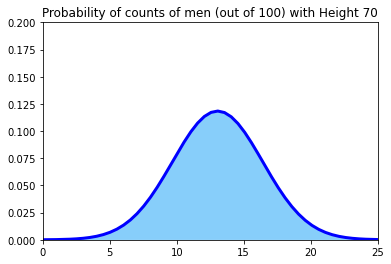

In [ ]:
#Answer
def countsOf70Dist(xvals):
  return (1/(np.sqrt(11.3469*2*np.pi)))*np.e**((-0.5)*((xvals-13.05)/(np.sqrt(11.3469)))**2)

xvals2 = np.linspace(0,100,200)
yvals3 = countsOf70Dist(xvals2)

plt.plot(xvals2, yvals3, color = "blue", linewidth=3)
plt.fill_between(xvals2, yvals3, color = "lightskyblue")
plt.xlim(0,25)
plt.ylim(0,.2)
plt.title("Probability of counts of men (out of 100) with Height 70")

Above is a graph of the distribution function. Now I will simulate the experiment 1000 times

(0.0, 200.0)

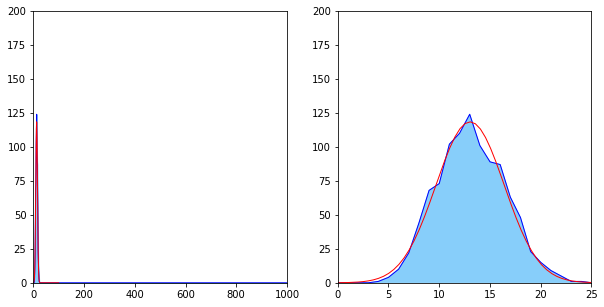

In [ ]:
#Answer
def trial(n):
  a = np.random.normal(70, 3, 100)
  count = 0
  for i in a:
    if i < 71 and i > 70:
      count += 1
  return count

n = 1000

xvals = np.linspace(0,n,n)
xvalsPrediction = yvals3*1000
trialResults = [0]*n
for i in range(0,n):
  trialResults[trial(n)]+=1

plt.subplots(1,2, figsize = (10,5))

plt.subplot(1,2,1)
plt.plot(xvals, trialResults, color = "blue", linewidth=1)
plt.fill_between(xvals,trialResults,0, color = "lightskyblue")
plt.plot(xvals2, xvalsPrediction, color = "red", linewidth=1)
plt.xlim(0, 1000)
plt.ylim(0,200)

plt.subplot(1,2,2)
plt.plot(xvals, trialResults, color = "blue", linewidth=1)
plt.fill_between(xvals,trialResults,0, color = "lightskyblue")
plt.plot(xvals2, xvalsPrediction, color = "red", linewidth=1)
plt.xlim(0,25)
plt.ylim(0,200)

The more experiments that I do, the closer i expect the simulated results ( blue part of the graph ) to be to the true distribution ( red part the of the graph ).

# Problem 2a: (15 points)

### Given the circuit below, the probability that any switch $S$ is closed (current passes through ) is $p$? What is the probability that there is a signal at the output?

### (Give your answer in terms of p)

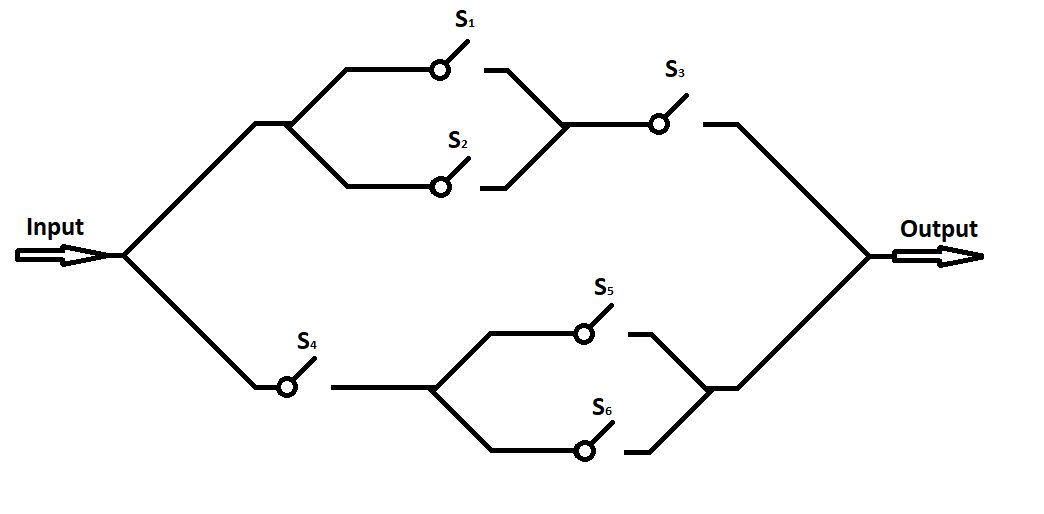

## Answer:

$S_i = 1$ means closed and current passes through

$O = 1$ means a signal was detected at the output

<br>

$P(O=1) = P(((S_1 \cup S_2) \cap S_3) \cup (S_4 \cap (S_5 \cup S_6)))$

$P(S_1=1 \cup S_2=1) = (2p - p^2)$

$P((S_1=1 \cup S_2=1) \cap S_3=1) = p(2p - p^2)$

<br>

The $S_1$  $S_2$  $S_3$ portion is identical to the $S_4$  $S_5$  $S_6$ portion by semantics of $\cap$

Thus: $P((S_1=1 \cup S_2=1) \cap S_3=1)$ is equal to $P(S_4=1 \cap (S_5=1 \cup S_6=1)$

<br>

So lets say event $A$ is $P((S_1=1 \cup S_2=1) \cap S_3=1)$ and B is $P(S_4=1 \cap (S_5=1 \cup S_6=1)$
Now lets find $P(A \cup B)$

<br>

$P(A \cup B) = 2p(2p - p^2) - (p(2p - p^2))^2$

$=4p^2 - 2p^3 - (4p^4 -4p^5 + p^6)$

$=4p^2 - 2p^3 - 4p^4 + 4p^5 - p^6$

# Problem 2b: (15 points)

### Given the same circuit above, if a signal is observed at the end, what is the probability that $S_3$ is open ( no current going through )

### (Give your answer in terms of p)

## Answer:

$P(S_3 = 0 | O = 1) = \frac{P(O = 1|S_3 = 0)P(S_3 = 0)}{P(O = 1)}$

<br>

$\frac{P(O = 1|S_3 = 0)P(S_3 = 0)}{P(O = 1)} = \frac{(p(2p - p^2))(1-p)}{4p^2 - 2p^3 - 4p^4 + 4p^5 + p^6}$

<br>

$ = \frac{2p^2 - 3p^3 + p^4}{4p^2 - 2p^3 - 4p^4 + 4p^5 + p^6}$

# Problem 3 (20 points)
### It follows that those with a larger height will be generally heavier than those with a smaller height. This is just a broad generalization and does not always apply. [Here](https://www.kaggle.com/mustafaali96/weight-height/version/1) is a link to a data set that contains anonymous entries on peoples' gender, height and weight. Download this dataset ( It is pretty small don't worry ). You might need to make a Kaggle account. Kaggle is an online community of data scientists and has a large collection of open source datasets for many different purposes. 

### Familiarize yourself with the package pandas, as you can use it to easily unpack the csv into manipulatable datatypes. If you are using [colab](https://colab.research.google.com/), which you most likely are, ensure that you have logged in with the university Google account. This following code segment can be used to mount your google drive file system to the colab environment.

### Using the data find two values for covariance between height and weight. There should be one value for male and female. 

(Hint: Make sure to store all intermediate values like averages and counts as they might be useful for the extra credit)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Answer:

In [ ]:
#Answer
csv = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/CS482_Assignments/weight-height.csv") 
print(csv.shape)
print(csv.head(10))

(10000, 3)
  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
5   Male  67.253016  152.212156
6   Male  68.785081  183.927889
7   Male  68.348516  167.971110
8   Male  67.018950  175.929440
9   Male  63.456494  156.399676


Lets say that $X$ is the random variable for height and $Y$% is the random variable for weight. Lets split up the dataset into Male and Female and calculate the mean height and weight for each, since they are nessacary to calculate covariance.

In [ ]:
#Answer

#Variables to store important statistics
numMale = 0
numFemale = 0

sumMaleHeight = 0
sumMaleWeight = 0

sumFemaleHeight = 0
sumFemaleWeight = 0

#Arrays to split the data into two smaller array by gender.
MaleArray = []
FemaleArray = []

for index, row in csv.iterrows():
  if row['Gender'] == 'Male':
    numMale += 1
    sumMaleHeight += row['Height']
    sumMaleWeight += row['Weight']
    MaleArray.append([row['Height'], row['Weight']])
  elif row['Gender'] == 'Female':
    numFemale += 1
    sumFemaleHeight += row['Height']
    sumFemaleWeight += row['Weight']
    FemaleArray.append([row['Height'], row['Weight']])

avgMaleHeight = sumMaleHeight / numMale
avgMaleWeight = sumMaleWeight / numMale
avgFemaleHeight = sumFemaleHeight / numFemale
avgFemaleWeight = sumFemaleWeight / numFemale

print("Number of Males: " + str(numMale))
print("Number of Females: " + str(numFemale) + "\n")
print("Sum of Males Height: " + str(sumMaleHeight))
print("Sum of Males Weight: " + str(sumMaleWeight) + "\n")
print("Sum of Females Weight: " + str(sumFemaleHeight))
print("Sum of Females Weight: " + str(sumFemaleWeight) + "\n")
print("Avg of Males Height: " + str(avgMaleHeight))
print("Avg of Males Weight: " + str(avgMaleWeight) + "\n")
print("Avg of Females Height: " + str(avgFemaleHeight))
print("Avg of Females Weight: " + str(avgFemaleWeight) + "\n")

#print(MaleArray)
#print(FemaleArray)

Number of Males: 5000
Number of Females: 5000

Sum of Males Height: 345131.72953108686
Sum of Males Weight: 935103.1032909645

Sum of Females Weight: 318543.8680171246
Sum of Females Weight: 679300.4650373434

Avg of Males Height: 69.02634590621737
Avg of Males Weight: 187.0206206581929

Avg of Females Height: 63.708773603424916
Avg of Females Weight: 135.8600930074687



The formula to calculate Covariance is as follows:

$\text{Cov}(X,Y) = \frac{\sum((X_i - \bar X)(Y_i - \bar Y))}{n-1}$

In [ ]:
MaleCovarianceSum = 0
FemaleCovarianceSum = 0

MaleHeightVarianceSum = 0
MaleWeightVarianceSum = 0

FemaleHeightVarianceSum = 0
FemaleWeightVarianceSum = 0

for i in range(0,5000):
  MaleCovarianceSum += ((MaleArray[i][0] - avgMaleHeight)*(MaleArray[i][1] - avgMaleWeight))
  FemaleCovarianceSum += ((FemaleArray[i][0] - avgFemaleHeight)*(FemaleArray[i][1] - avgFemaleWeight))
  MaleHeightVarianceSum += (MaleArray[i][0] - avgMaleHeight) ** 2
  MaleWeightVarianceSum += (MaleArray[i][1] - avgMaleWeight) ** 2
  FemaleHeightVarianceSum += (FemaleArray[i][0] - avgFemaleHeight) ** 2
  FemaleWeightVarianceSum += (FemaleArray[i][1] - avgFemaleWeight) ** 2

MaleCovariance = MaleCovarianceSum / (5000 - 1)
FemaleCovariance = FemaleCovarianceSum / (5000 - 1)
MaleHeightVariance = MaleHeightVarianceSum / (5000 - 1)
MaleWeightVariance = MaleWeightVarianceSum / (5000 - 1)
FemaleHeightVariance = FemaleHeightVarianceSum / (5000 - 1)
FemaleWeightVariance = FemaleWeightVarianceSum / (5000 - 1)

print("Male Height vs Weight Covariance: " + str(MaleCovariance))
print("Female Height vs Weight Covariance: " + str(FemaleCovariance) + "\n")
print("Male Height Variance: " + str(MaleHeightVariance))
print("Male Weight Variance: " + str(MaleWeightVariance) + "\n")
print("Female Height Variance: " + str(FemaleHeightVariance))
print("Female Weight Variance: " + str(FemaleWeightVariance) + "\n")

Male Height vs Weight Covariance: 48.87964899179632
Female Height vs Weight Covariance: 43.576404164603254

Male Height Variance: 8.198843252520494
Male Weight Variance: 391.2940740160854

Female Height Variance: 7.269947493670135
Female Weight Variance: 361.8542814043981



#Problem 3b: (10 points)

### Find the correlation between height and weight for Males and Females

## Answer:

The formula to calculate Correlation is as follows:

$p(X,Y) = \frac{\text{Cov}(X,Y) }{\sigma_X\sigma_Y}$

In [ ]:
MaleCorrelation = MaleCovariance/(MaleHeightVariance*(MaleWeightVariance ** 0.5))
FemaleCorrelation = FemaleCovariance/(FemaleHeightVariance*(FemaleWeightVariance ** 0.5))

print("Male Height vs Weight Correlation: " + str(MaleCorrelation))
print("Female Height vs Weight Correlation: " + str(FemaleCorrelation))

Male Height vs Weight Correlation: 0.3013865448033009
Female Height vs Weight Correlation: 0.31510352264486097


# Extra credit: (5 points)

### Using matplotlib's or seaborn's 3D graphing functionality, create a wireframe graph of the multivariate probability distribution of heights and weights for either men or women ( You don't have to do both ). Use the data and calculated values from problem 3 to solve this problem.
 ( Hint: You can assume both distributions are normal. Use [this](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) link to help in understanding )


## Answer:

In [ ]:
print("Avg of Males Height: " + str(avgMaleHeight))
print("Avg of Males Weight: " + str(avgMaleWeight) + "\n")
print("Male Height Standard Deviation: " + str(MaleHeightVariance ** 0.05))
print("Male Weight Standard Deviation: " + str(MaleWeightVariance ** 0.05) + "\n")
print("Male Height vs Weight Correlation: " + str(MaleCorrelation))

Avg of Males Height: 69.02634590621737
Avg of Males Weight: 187.0206206581929

Male Height Standard Deviation: 1.1109323901749046
Male Weight Standard Deviation: 1.3477991046670488

Male Height vs Weight Correlation: 0.3013865448033009


Using all the above values, we will construct a function that given an x and y can return a z "probability" value

In [ ]:
from numpy.ma.extras import mask_rows
#let x be random variable for height and y be random variable for weight
def maleHeightWeightDist(x, y):
  amh = 69.0263 #average male height
  amw = 187.0206 #average male weight
  mhs = 1.1109 #male height standard dev
  mws = 1.3477 #male weight standard dev
  mc = 0.3013 #male height weight correlation
  return (1/(2*3.1415*mhs*mws*((1-mc**2)**0.5))*(2.7182**(((-1)/(2*(1-mc**2)))-((2*mc)*((((x-amh)/mhs)**2)-((2*mc)*((x-amh)/mhs)*((y-amw)/mws))+(((y-amw)/mws)**2))))))

#testing
#print(maleHeightWeightDist(69, 187))

In [ ]:
N = 25  

x_values = np.linspace(65, 75, N)
y_values = np.linspace(182, 192, N)

X, Y = np.meshgrid(x_values, y_values)

#plt.scatter(X, Y);

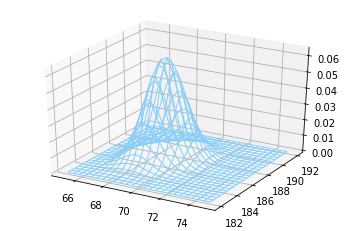

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, maleHeightWeightDist(X, Y), color='lightskyblue', lw=1);